In [171]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

In [172]:
import pandas as pd
import numpy as np

In [173]:
import os
dfs_our = []
for entry in os.scandir('../data/encoded'):
    group_df = pd.read_csv(entry.path)
    dfs_our.append(group_df)
df_our = pd.concat(dfs_our)

print(df_our.shape)
df_our.head()

(2180, 63)


,ID,Время создания,Время изменения,Ваш пол,Сколько вам лет?,"Укажите тип населённого пункта, в котором вы проживаете.",Источник ответов,Кого бы вы НЕ хотели видеть своим соседом? / Наркозависимого,Кого бы вы НЕ хотели видеть своим соседом? / Человека другой расы,Кого бы вы НЕ хотели видеть своим соседом? / Гомосексуала,...,Q130: Immigration policy preference,Q189: Justifiable: For a man to beat his wife,Q182: Justifiable: Homosexuality,Q183: Justifiable: Prostitution,Q184: Justifiable: Abortion,Q190: Justifiable: Parents beating children,Q186: Justifiable: Sex before marriage,Q187: Justifiable: Suicide,Q188: Justifiable: Euthanasia,Q193: Justifiable: Having casual sex
0,1071068771,2022-01-25 08:44:38,2022-01-25 08:44:38,Женский,до 29,крупный город (свыше 500 тыс. жителей),female_50,Наркозависимого,NaN,NaN,...,1,1.0,10.0,6.0,10.0,1.0,1.0,3.0,10.0,10.0
1,1070960166,2022-01-25 06:47:59,2022-01-25 06:47:59,Женский,более 50,средний город (50-100 тыс. жителей),female_50,Наркозависимого,NaN,NaN,...,3,1.0,2.0,2.0,10.0,5.0,5.0,3.0,5.0,3.0
2,1070445182,2022-01-24 19:08:41,2022-01-24 19:08:41,Женский,более 50,средний город (50-100 тыс. жителей),female_50,Наркозависимого,NaN,NaN,...,-1,1.0,4.0,7.0,10.0,1.0,10.0,5.0,8.0,7.0
3,1070297390,2022-01-24 17:29:07,2022-01-24 17:29:07,Женский,более 50,крупный город (свыше 500 тыс. жителей),female_50,Наркозависимого,NaN,NaN,...,-1,1.0,1.0,1.0,1.0,1.0,6.0,4.0,2.0,1.0
4,1070142516,2022-01-24 15:53:03,2022-01-24 15:53:03,Женский,более 50,крупный город (свыше 500 тыс. жителей),female_50,Наркозависимого,NaN,NaN,...,3,1.0,1.0,1.0,9.0,1.0,9.0,1.0,6.0,1.0


In [174]:
df_test = pd.read_excel('../data/world_values_survey.xlsx')
df_test = df_test[df_test.columns[1:]] # Remove unnamed column
df_test.head()

,Q18: Neighbors: Drug addicts,Q19: Neighbors: People of a different race,Q22: Neighbors: Homosexuals,Q21: Neighbors: Immigrants/foreign workers,Q23: Neighbors: People of a different religion,Q29: Men make better political leaders than women do,Q36: Homosexual couples are as good parents as other couples,Q212: Political action: Joining unofficial strikes,Q71: Confidence: The Government,Q69: Confidence: The Police,...,Q189: Justifiable: For a man to beat his wife,Q182: Justifiable: Homosexuality,Q183: Justifiable: Prostitution,Q184: Justifiable: Abortion,Q190: Justifiable: Parents beating children,Q186: Justifiable: Sex before marriage,Q187: Justifiable: Suicide,Q188: Justifiable: Euthanasia,Q193: Justifiable: Having casual sex,Q223: Which party would you vote for if there were a national election tomorrow
0,1,2,1,2,2,3,4,3,2,3,...,1,1,1,8,1,8,1,1,9,643032
1,1,2,2,2,1,3,4,3,3,2,...,1,8,6,6,1,9,1,3,4,643003
2,1,2,2,2,2,3,3,3,3,2,...,8,8,7,5,4,9,4,3,9,643032
3,1,2,2,1,2,2,3,3,2,2,...,1,5,1,3,5,3,1,-1,6,643032
4,1,2,2,2,2,3,4,3,2,2,...,1,8,3,10,4,10,8,10,7,643037


In [175]:
df_our['source'] = 'ours'
df_test['source'] = 'world_values_survey'
df = pd.concat([df_our, df_test])
df_our.shape, df_test.shape, df.shape

((2180, 64), (1810, 24), (3990, 65))

In [176]:
def plot_cats(col):
    plt.figure(figsize=(10,5))
    sns.countplot(x=col, hue='source', data=df)
    plt.title(col)
    plt.show()

### Наркозависимый - идентично

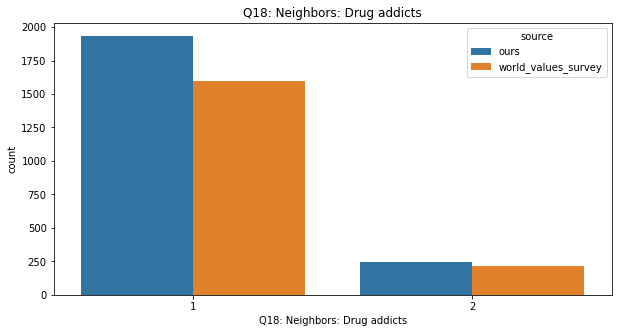

In [177]:
plot_cats("Q18: Neighbors: Drug addicts")

### В интернете люди меньшие расисты - не факт, что значимо

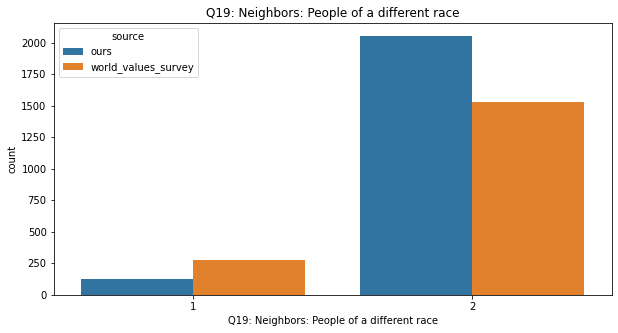

In [178]:
plot_cats('Q19: Neighbors: People of a different race')

### В интернете люди меньшие гомофобы - выглядит, как будто кодирование инвертировано. Мы точно не ошиблись в кодировании ответов? 

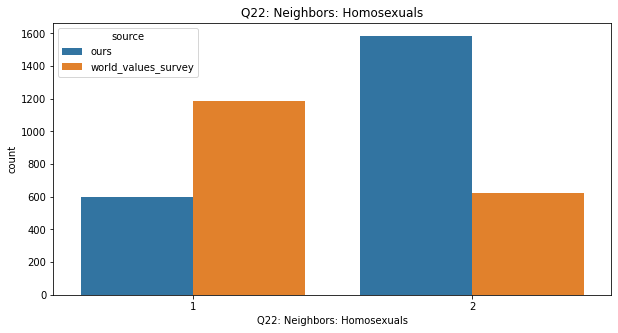

In [179]:
plot_cats('Q22: Neighbors: Homosexuals')

### Толератнее к иммигрантам???? 

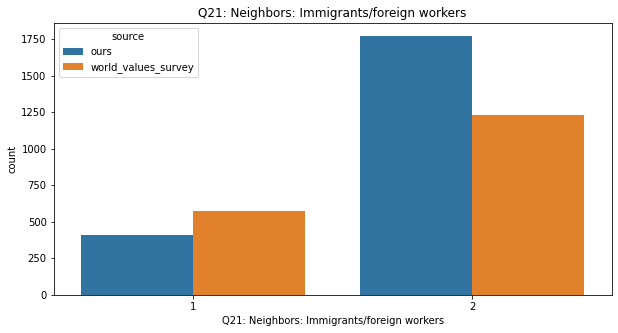

In [180]:
plot_cats('Q21: Neighbors: Immigrants/foreign workers')

### Мусульман не любят везде

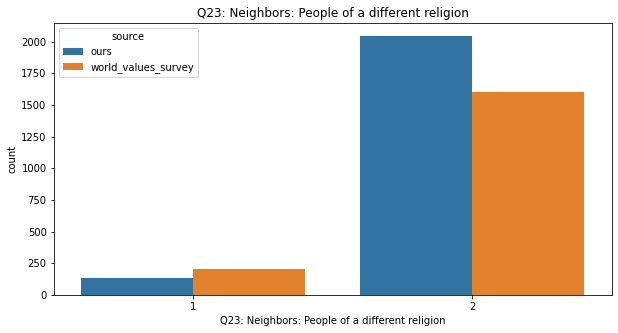

In [181]:
plot_cats('Q23: Neighbors: People of a different religion')

### Сексизм одинаков

Мужчины лучше женщин в политике

1 - полностью согласен

2 - скорее согласен

3 - скорее не согласен

4 - полностью не согласен

-1 - затрудняюсь

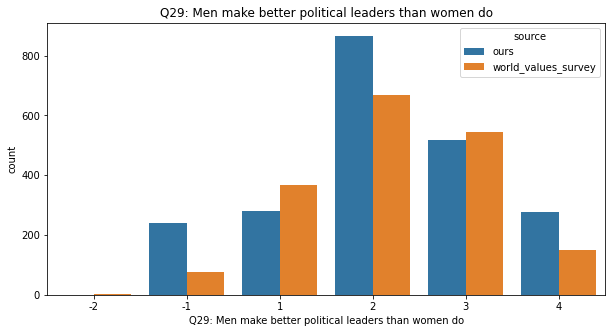

In [182]:
col = 'Q29: Men make better political leaders than women do'
plot_cats(col)

In [183]:
df[(df[col] > 0) & (df.source == 'ours')][col].describe()

count    1941.000000
mean        2.408037
std         0.903269
min         1.000000
25%         2.000000
50%         2.000000
75%         3.000000
max         4.000000
Name: Q29: Men make better political leaders than women do, dtype: float64

In [184]:
df[(df[col] > 0) & (df.source == 'world_values_survey')][col].describe()

count    1731.000000
mean        2.274986
std         0.894139
min         1.000000
25%         2.000000
50%         2.000000
75%         3.000000
max         4.000000
Name: Q29: Men make better political leaders than women do, dtype: float64

## А что за -2 в данных world values?

### В интернете чуть меньше гомофобии - непохоже на значимое

Гомосексуальные пары такие же хорошие родители

1 - полностью согласен

2 - скорее согласен

3 - ни согласен, ни несогласен

4 - скорее не согласен

5 - полностью не согласен

-1 - затрудняюсь ответить

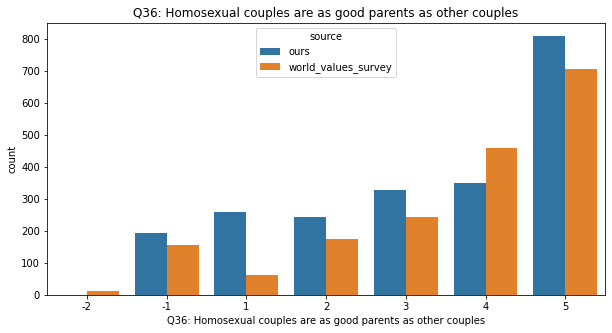

In [185]:
plot_cats('Q36: Homosexual couples are as good parents as other couples')

### В Интернете чуть больше склонны к протестам

Посетили бы вы несанкицонированный митинг

1 - уже посещал

2 - мог бы посетить

3 - никогда бы не посетил

-1 - затрудняюсь ответить

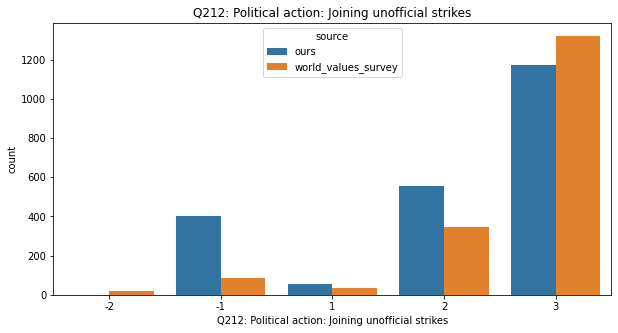

In [186]:
plot_cats('Q212: Political action: Joining unofficial strikes')

### В Интернете чуть больше не доверяют правительству

Доверяете ли вы правительству

1 - полностью доверяю

2 - скорее доверяю

3 - скорее не доверяю

4 - полностью не доверяю

-1 - затрудняюсь ответить

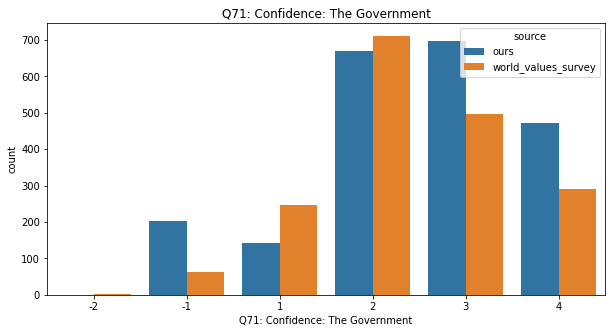

In [187]:
plot_cats('Q71: Confidence: The Government')

### В Интернете чуть больше не доверяют полиции

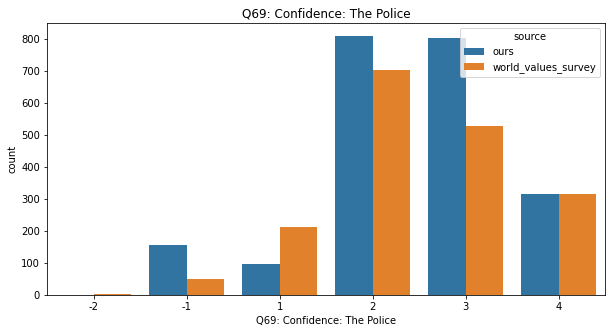

In [188]:
plot_cats('Q69: Confidence: The Police')

### PREFERENCE FALSIFICATION (!!!) - БОЛЬШЕ СЕКСИЗМА

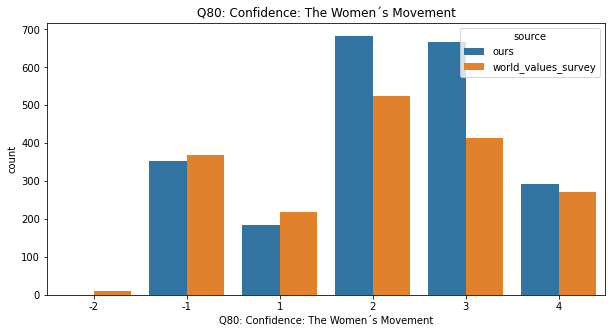

In [189]:
plot_cats('Q80: Confidence: The Women´s Movement')

### В интернете не верят в фальсификации - чепуха какая-то

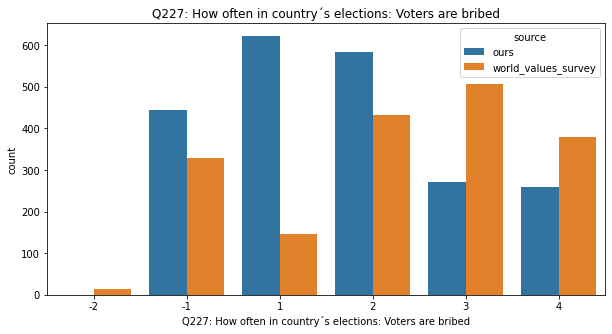

In [190]:
plot_cats('Q227: How often in country´s elections: Voters are bribed')

### Не любят иностранцев одинаково

Имиграционная политика

1 - пускать любого, кто захочет

2 - пускать пока есть работа

3 - квоты

4 - никого не пускать

-1 - затрудняюсь

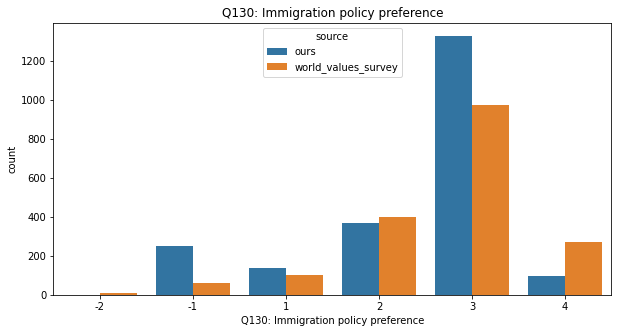

In [191]:
plot_cats('Q130: Immigration policy preference')

### Одинаково про домашнее насилие

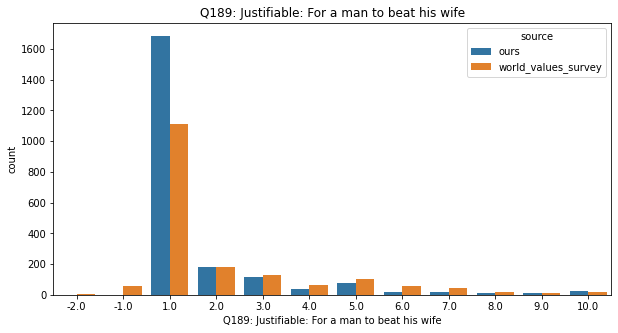

In [192]:
plot_cats('Q189: Justifiable: For a man to beat his wife')

### Одинаково про гомосексуализм

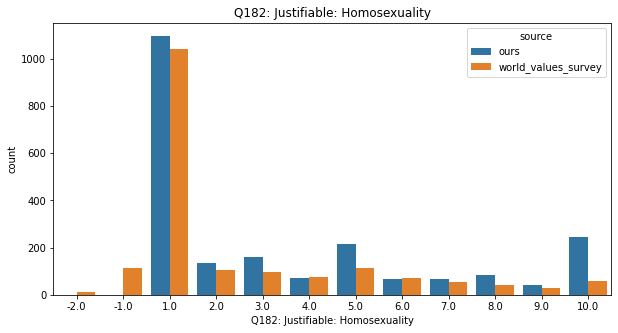

In [193]:
plot_cats('Q182: Justifiable: Homosexuality')

### Чуть лояльнее относятся к проституткам - на самом деле нормально так лояльнее, скорее всего значимо

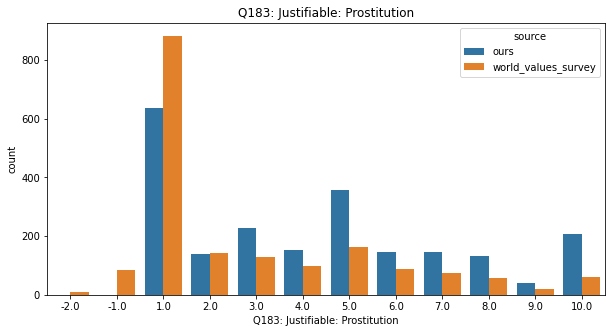

In [194]:
plot_cats('Q183: Justifiable: Prostitution')

### В интернете спокойнее относятся к абортам - гораздо спокойнее!

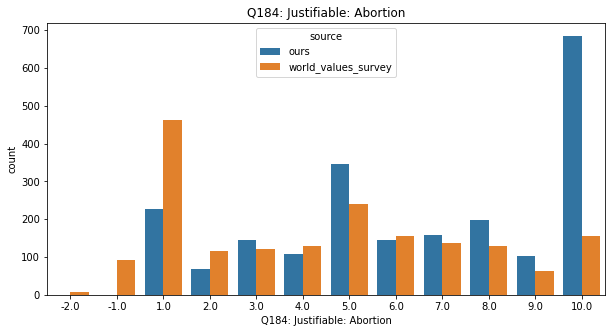

In [195]:
plot_cats('Q184: Justifiable: Abortion')

### Одинаково не хотят бить детей - значимо меньше бьют детей имхо

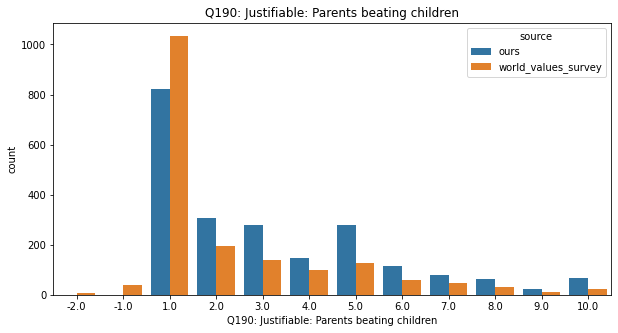

In [196]:
plot_cats('Q190: Justifiable: Parents beating children')

### В Интернете люди более сексуально раскрепощённые (PREFERENCE FALSIFICATION)

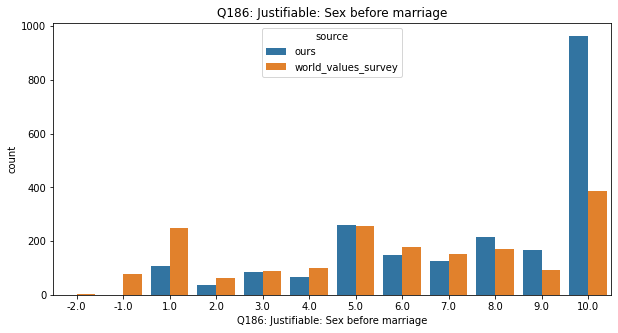

In [197]:
plot_cats('Q186: Justifiable: Sex before marriage')

### Не любят суицид везде

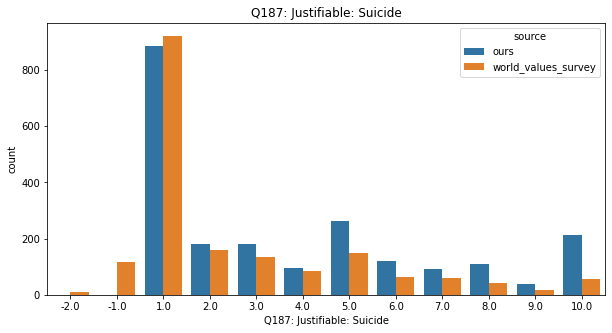

In [198]:
plot_cats('Q187: Justifiable: Suicide')

### Более лояльны к эвтаназии

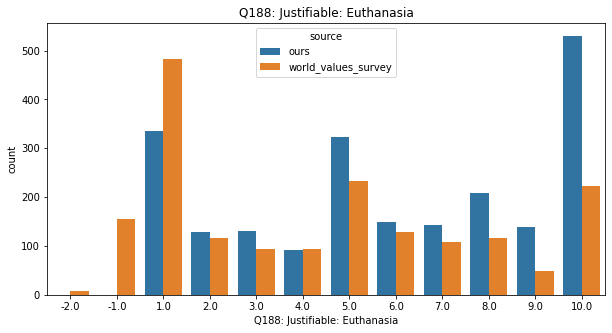

In [199]:
plot_cats('Q188: Justifiable: Euthanasia')

### Более сексуально раскрепощённые

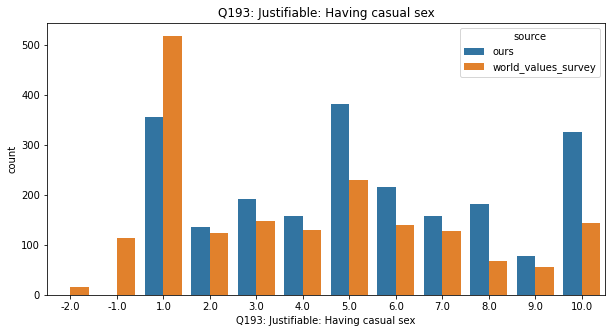

In [200]:
plot_cats('Q193: Justifiable: Having casual sex')

## Выводы

* большинство показателей совпадают
* в интернете люди меньшие расисты и гомофобы, а также спокойнее в эвтаназии (следствие большей прогрессивности?)
* при этом в интернете больше не любят власть и большие сексисты (preference falsification)
* в интернете люди более сексульно раскрепощённые, проституция и аборт в большем почёте (прогресивность + preference falsification)